Read the dataset below which was used for Logistic Regression: https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv

Apply the KNN Algorithm on the dataset .
Compute all the classification metrics
Plot the ROC Curve for the model and find the AUC
Compare the AUC of KNN Model with Logistic Regression Model and find which Model has higher AUC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
data.drop(['CASENUM'],axis=1,inplace=True)
data

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
5,0,1.0,1.0,0.0,35.0,0.309
6,0,0.0,1.0,0.0,9.0,3.538
7,0,1.0,1.0,0.0,34.0,4.881
8,1,1.0,1.0,0.0,60.0,0.874
9,1,0.0,1.0,0.0,NaN,0.350


In [4]:
data.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [5]:
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
5,0,1.0,1.0,0.0,35.0,0.309
6,0,0.0,1.0,0.0,9.0,3.538
7,0,1.0,1.0,0.0,34.0,4.881
8,1,1.0,1.0,0.0,60.0,0.874
9,1,0.0,1.0,0.0,10.0,0.350


In [6]:
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [7]:
X = data.iloc[:,1:]
X.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [8]:
y=data.ATTORNEY
y.head()

0    0
1    1
2    1
3    0
4    1
Name: ATTORNEY, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [10]:
# Training Data
from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[314, 173],
       [ 95, 356]], dtype=int64)

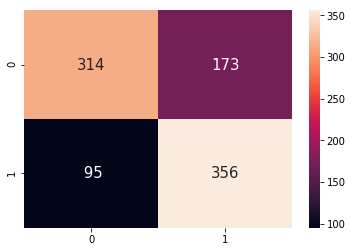

In [13]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'15'})

In [14]:
# Testing Data
from  sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_test,y_test)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
y_test_pred = reg.predict(X_test)
y_test_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[ 99,  99],
       [ 36, 168]], dtype=int64)

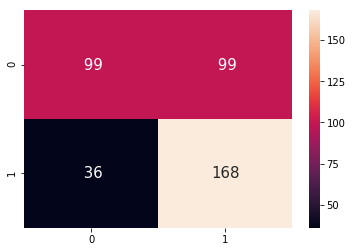

In [17]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'15'})

In [18]:
from sklearn.metrics import classification_report
# Syntax: classification_report(actualValues,predictedValues)
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       487
           1       0.67      0.79      0.73       451

   micro avg       0.71      0.71      0.71       938
   macro avg       0.72      0.72      0.71       938
weighted avg       0.72      0.71      0.71       938

              precision    recall  f1-score   support

           0       0.73      0.50      0.59       198
           1       0.63      0.82      0.71       204

   micro avg       0.66      0.66      0.66       402
   macro avg       0.68      0.66      0.65       402
weighted avg       0.68      0.66      0.65       402



In [19]:
#KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.864142,0.323773,-0.118550,1.125005,0.482957
1,0.864142,0.323773,-0.118550,-1.005695,0.121123
2,-1.157217,0.323773,-0.118550,-1.107157,0.660376
3,0.864142,0.323773,8.435274,-1.310081,-0.030183
4,-1.157217,0.323773,-0.118550,-0.802771,0.065398
5,-1.157217,0.323773,-0.118550,-0.599847,0.941872
6,0.864142,0.323773,-0.118550,-0.752040,0.056153
7,0.864142,0.323773,-0.118550,-0.498386,0.283299
8,-1.157217,0.323773,-0.118550,-0.396924,0.004926
9,-1.157217,-3.088580,-0.118550,0.668426,-0.397640


In [20]:
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
scaled_X_test

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,-1.083039,0.289064,-0.151330,-0.780654,-0.324633
1,-1.083039,0.289064,-0.151330,-0.780654,3.001351
2,0.923328,0.289064,-0.151330,-0.879464,-0.268778
3,0.923328,0.289064,-0.151330,-0.928870,0.185782
4,0.923328,0.289064,6.608076,0.899128,3.381416
5,-1.083039,-3.459442,-0.151330,-0.533627,-0.260124
6,-1.083039,0.289064,-0.151330,0.997939,-0.050419
7,-1.083039,0.289064,-0.151330,1.590803,-0.276834
8,0.923328,0.289064,-0.151330,-0.336006,4.236945
9,-1.083039,0.289064,-0.151330,-0.780654,-0.298603


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)#,metric='euclidean')
    knn_model.fit(scaled_X_train,y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores

[0.582089552238806,
 0.5671641791044776,
 0.6194029850746269,
 0.6169154228855721,
 0.6442786069651741,
 0.5870646766169154,
 0.654228855721393,
 0.6169154228855721,
 0.6243781094527363,
 0.6019900497512438,
 0.6318407960199005,
 0.6144278606965174,
 0.6517412935323383,
 0.6368159203980099,
 0.6343283582089553,
 0.6169154228855721,
 0.6417910447761194,
 0.6343283582089553,
 0.6442786069651741]

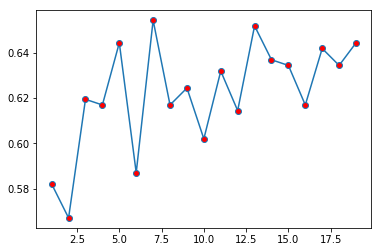

In [24]:
plt.plot(range(1,20),scores,marker='o',markerfacecolor='r',linestyle='-')

In [25]:
final_model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [26]:
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,

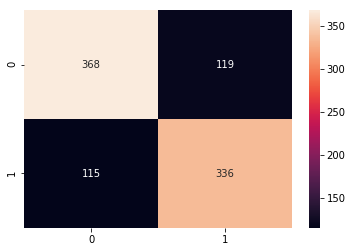

In [27]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt='d')

In [28]:
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       487
           1       0.74      0.75      0.74       451

   micro avg       0.75      0.75      0.75       938
   macro avg       0.75      0.75      0.75       938
weighted avg       0.75      0.75      0.75       938



In [29]:
final_test_pred = final_model.predict(scaled_X_test) #y_test   # Prediction on Test Data
final_test_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,

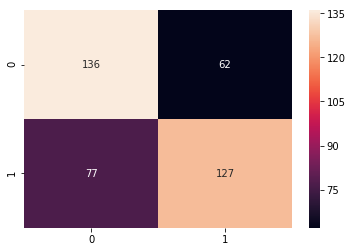

In [30]:
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt='d')

In [31]:
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       198
           1       0.67      0.62      0.65       204

   micro avg       0.65      0.65      0.65       402
   macro avg       0.66      0.65      0.65       402
weighted avg       0.66      0.65      0.65       402



In [32]:
y_test_prob=final_model.predict_proba(scaled_X_test)
y_test_prob=pd.DataFrame(y_test_prob)
y_test_prob

,0,1
0,0.428571,0.571429
1,1.000000,0.000000
2,0.571429,0.428571
3,0.714286,0.285714
4,0.714286,0.285714
5,0.428571,0.571429
6,0.714286,0.285714
7,0.285714,0.714286
8,1.000000,0.000000
9,0.428571,0.571429


In [33]:
y_test_prob1=reg.predict_proba(X_test)   # Logistic Regression
y_test_prob1=pd.DataFrame(y_test_prob1)
y_test_prob1

,0,1
0,0.415945,0.584055
1,0.998492,0.001508
2,0.368043,0.631957
3,0.596542,0.403458
4,0.999409,0.000591
5,0.638690,0.361310
6,0.577089,0.422911
7,0.468662,0.531338
8,0.999841,0.000159
9,0.428996,0.571004


In [34]:
y_test

1186    1
403     0
1062    1
523     0
1286    0
1200    1
336     0
17      0
287     0
530     1
1132    1
971     0
690     1
944     0
157     0
1163    1
849     1
961     0
1135    1
851     1
418     1
798     1
1184    0
402     0
1054    1
883     1
1271    0
335     1
786     1
577     0
       ..
1051    0
93      0
452     0
1283    0
1315    0
399     0
1249    0
1038    0
197     1
1297    0
701     0
128     1
460     1
992     1
309     1
281     1
200     1
682     0
810     0
889     1
940     1
1326    0
148     0
621     1
327     0
1088    0
65      1
508     0
765     0
967     0
Name: ATTORNEY, Length: 402, dtype: int64

In [35]:
from sklearn.metrics import roc_auc_score,roc_curve
m_prob = final_model.predict_proba(scaled_X_test)[:,1]
#m_prob
fpr,tpr,threshold = roc_curve(y_test,m_prob,pos_label=1)
print(fpr)
print(tpr)
print(threshold)
print(pd.DataFrame(threshold))

[0.         0.02525253 0.05555556 0.20707071 0.31313131 0.53535354
 0.7979798  0.9040404  1.        ]
[0.         0.05392157 0.1127451  0.34313725 0.62254902 0.78921569
 0.93627451 0.99019608 1.        ]
[2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]
          0
0  2.000000
1  1.000000
2  0.857143
3  0.714286
4  0.571429
5  0.428571
6  0.285714
7  0.142857
8  0.000000


In [37]:
m_prob1 = reg.predict_proba(scaled_X_test)[:,1]
fpr1,tpr1,threshold1 = roc_curve(y_test,m_prob1,pos_label=1)   # Logistic Regression

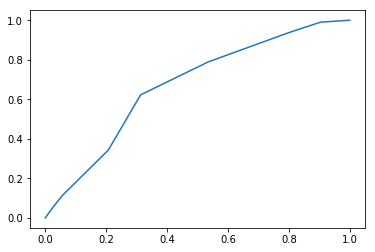

In [38]:
plt.plot(fpr,tpr)

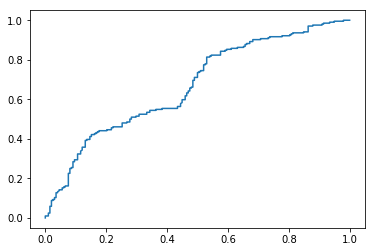

In [39]:
# Logistic Regression
plt.plot(fpr1,tpr1)

In [40]:
roc_auc_score(y_test,m_prob)

0.6700460487225194

In [41]:
# Logistic Regression 
roc_auc_score(y_test,m_prob1)

0.6689814814814814